For Medieval and more recent periods, we want to know what types are present.
For 

- Medieval ceramics at high localized density
- Chipped stone artifacts at medium density
- Ground stone artifacts at low density

Iron Age ceramics tend to be sparse unless you encounter a village site, in which case they are strongly clustered in areas ~100 meters in diameter.

If we 

In [12]:
import geopandas as gpd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import prospect

import matplotlib.pyplot as plt

In [13]:
# DBSCAN dev
def get_n_clusters(points: gpd.GeoDataFrame):

    coords = np.stack([points.geometry.x.values, points.geometry.y.values]).T
    scaled_coords = StandardScaler().fit_transform(coords)
    db = DBSCAN(eps=0.3, min_samples=4).fit(scaled_coords)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    return {"n_clusters": n_clusters_, "n_noise": n_noise_}

In [14]:
area_1950 = prospect.Area.from_shapefile(name="boundary_1950", path="./assignment_files/previous_survey_1950/boundary_1950.shp")

In [15]:
# iron_age = prospect.Layer.from_thomas_points(parent_rate=0.000005, child_rate=15, gauss_var=20, name="iron_age", area=area)

iron_age = prospect.Layer.from_shapefile(path="./assignment_files/previous_survey_1950/artifacts_1950.shp", name="iron_age", area=area_1950, time_penalty=60, ideal_obs_rate=1.0)

In [ ]:
iron_age_noise = prospect.Layer.from_poisson_points(rate=0.00001, name="iron_age", area=area)

In [ ]:
iron_age_noise.df

In [ ]:
iron_age_noise.df.to_file("./assignment_files/iron_age_noise.shp")

In [ ]:
# iron_age.df.to_file("./assignment_files/iron_age_artifacts.shp")

<AxesSubplot:>

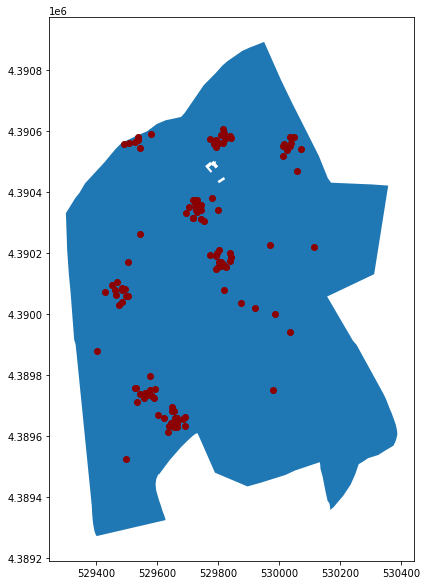

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
area_1950.df.plot(ax=ax)
# radials.df.plot(ax=ax, color="white")
iron_age.df.plot(ax=ax, color="darkred")

In [17]:
get_n_clusters(iron_age.df)

{'n_clusters': 7, 'n_noise': 10}

In [ ]:
get_n_clusters(new_layer.df)

In [ ]:
new_layer = prospect.Layer.from_thomas_points(parent_rate=0.000003, child_rate=15, gauss_var=20, name="new_layer", area=area)
fig, ax = plt.subplots()
area.df.plot(ax=ax)
new_layer.df.plot(ax=ax, color="darkred")

In [ ]:
new_coords = np.stack([new_layer.df["shape"].x.values, new_layer.df["shape"].y.values]).T

In [ ]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(new_coords)
db = DBSCAN(eps=0.3, min_samples=4).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

In [ ]:
assemblage = prospect.Assemblage(name="previous_assemblage", layer_list=[iron_age])

In [ ]:
assemblage.df

In [ ]:
coverage15 = prospect.Coverage.from_transects(name="previous_coverage", area=area, spacing=15)
coverage10 = prospect.Coverage.from_transects(name="previous_coverage", area=area, spacing=10)
print((coverage15.df["length"].sum() * 4) / 60 / 60, (coverage10.df["length"].sum() * 4)/60/60)

In [ ]:
# Create one perfect surveyor and assign them to a team
surveyor = prospect.Surveyor(name="surveyor", team_name="team", surveyor_type="perfect", skill=1.0, speed_penalty=0.0)
team = prospect.Team(name="team", surveyor_list=[surveyor], assignment="naive")

In [ ]:
survey = prospect.Survey(name="previous_survey", area=area, coverage=coverage10, assemblage=assemblage, team=team)

In [ ]:
survey.run(n_runs=1)

In [ ]:
survey.discovery_plot()